In [1]:
import os
import imageio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import stats, signal
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import seaborn as sns
import cv2 
import pydicom as dicom
import PIL
import skimage as ski
from skimage import segmentation
from skimage import exposure
import pickle
%matplotlib inline

## Lectura de los datasets

In [2]:
dicom_1h=dicom.dcmread("./dataset/1h/POST_EM.dcm")
dicom_15h=dicom.dcmread("./dataset/15h/POST_EM.dcm")
dicom_40h=dicom.dcmread("./dataset/40h/POST_EM.dcm")
dicom_64h=dicom.dcmread("./dataset/64h/POST_EM.dcm")

Obtengo de las imágenes anteriores los metadatas que me seran de utilidad

In [3]:
# wc_x Window Center - ww_x Window With
wc_1=dicom_1h.WindowCenter
ww_1=dicom_1h.WindowWidth

wc_15=dicom_15h.WindowCenter
ww_15=dicom_15h.WindowWidth

wc_40=dicom_15h.WindowCenter
ww_40=dicom_15h.WindowWidth

wc_64=dicom_64h.WindowCenter
ww_64=dicom_64h.WindowWidth

In [4]:
n0=dicom_1h.Rows
n1=dicom_1h.Columns #Tamaño de la imágen
d0=dicom_1h.PixelSpacing[0]
d1=dicom_1h.PixelSpacing[1] #dimension del pixel
x = np.arange(0.0, (n0+1)*d0, d0)
y = np.arange(0.0, (n1+1)*d1, d1)
print ('Las imágnes tienen',n0,'pixeles de alto','y',n1,'pixeles de ancho')
print ('Los pixeles miden',d0,'mm x', d1,'mm')

Las imágnes tienen 1024 pixeles de alto y 256 pixeles de ancho
Los pixeles miden 2.209030 mm x 2.209030 mm


Se tranforman el valor de cada pixel de acuerdo al wc y ww

In [5]:
def DicomtoRGB(dicomfile,wc,ww):
    """Create new image(numpy array) filled with certain color in RGB"""
    # Create black blank image
    image = np.zeros((dicomfile.Rows, dicomfile.Columns), np.uint8)
    #loops on image height and width
    i=0
    j=0
    while i<dicomfile.Rows:
        j=0
        while j<dicomfile.Columns:
            color = yaxpb(dicomfile.pixel_array[i][j],wc,ww) #linear transformation to be adapted
            image[i][j] = (color)
            j=j+1
        i=i+1
    return image
##linear transformation : from [bt < pxvalue < wt] linear to [0<pyvalue<255]: loss of information... 
def yaxpb(pxvalue,wc,ww):
    if pxvalue <= wc-0.5-(ww-1)/2:
        y=0
    elif pxvalue > wc-0.5+(ww-1)/2:
        y=255
    else:
        y=(((pxvalue-(wc-0.5))/(ww-1))+0.5)*255
    return y
    

In [6]:
imagen_1=np.flipud(DicomtoRGB(dicom_1h,wc_1,ww_1))
imagen_15=np.flipud(DicomtoRGB(dicom_15h,wc_1,ww_1))
imagen_40=np.flipud(DicomtoRGB(dicom_40h,wc_1,ww_1))
imagen_64=np.flipud(DicomtoRGB(dicom_64h,wc_1,ww_1))
maximo=np.max([imagen_1,imagen_15,imagen_40,imagen_64])

Text(0.5, 1.0, '64 horas')

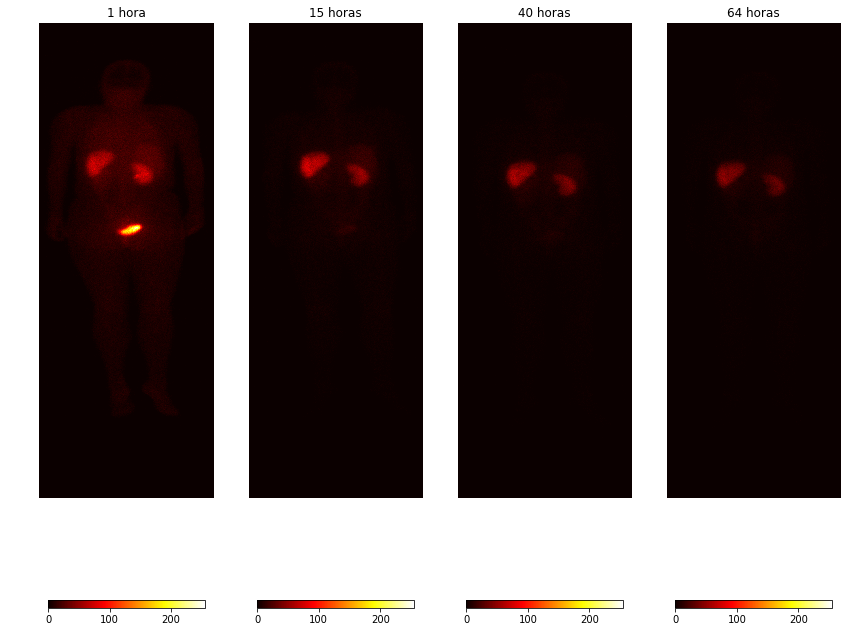

In [7]:
plt.figure(16,figsize=((d1*n1/0.0393701)/1000,(d0*n0/0.0393701)/1000))
plt.subplot(4,4,1)
plt.pcolormesh(y,x,imagen_1,cmap='hot',vmax=maximo)
plt.colorbar(orientation='horizontal',shrink=0.9)
plt.axis('off')
plt.title('1 hora')
plt.subplot(4,4,2)
plt.pcolormesh(y,x,imagen_15,cmap='hot',vmax=maximo)
plt.colorbar(orientation='horizontal',shrink=0.9)
plt.axis('off')
plt.title('15 horas')
plt.subplot(4,4,3)
plt.pcolormesh(y,x,imagen_40,cmap='hot',vmax=maximo)
plt.colorbar(orientation='horizontal',shrink=0.9)
plt.axis('off')
plt.title('40 horas')    
plt.subplot(4,4,4)
plt.pcolormesh(y,x,imagen_64,cmap='hot',vmax=maximo)
plt.colorbar(orientation='horizontal',shrink=0.9)
plt.axis('off')
plt.title('64 horas')

Se suavizan las imágenes 

In [8]:

#imagen_1_b = cv2.GaussianBlur(imagen_1,(9,9),0)
imagen_1_b = ski.filters.gaussian(imagen_1,sigma=1.5,multichannel=True,preserve_range=True)
#imagen_15_b = cv2.GaussianBlur(imagen_15,(9,9),0)
imagen_15_b = ski.filters.gaussian(imagen_15,sigma=1.5,multichannel=True,preserve_range=True)

#imagen_40_b = cv2.GaussianBlur(imagen_40,(9,9),0)
imagen_40_b = ski.filters.gaussian(imagen_40,sigma=1.5,multichannel=True,preserve_range=True)

#imagen_64_b = cv2.GaussianBlur(imagen_64,(9,9),0)
imagen_64_b = ski.filters.gaussian(imagen_64,sigma=1.5,multichannel=True,preserve_range=True)


Text(0.5, 1.0, '64 horas')

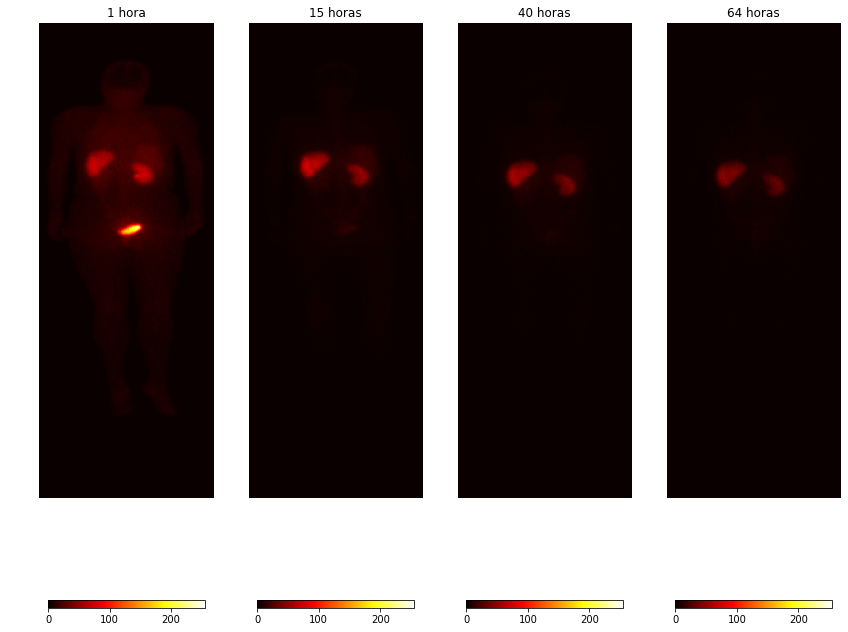

In [9]:
plt.figure(16,figsize=((d1*n1/0.0393701)/1000,(d0*n0/0.0393701)/1000))
plt.subplot(4,4,1)
plt.pcolormesh(y,x,imagen_1_b,cmap='hot',vmax=maximo)
plt.colorbar(orientation='horizontal',shrink=0.9)
plt.axis('off')
plt.title('1 hora')
plt.subplot(4,4,2)
plt.pcolormesh(y,x,imagen_15_b,cmap='hot',vmax=maximo)
plt.colorbar(orientation='horizontal',shrink=0.9)
plt.axis('off')
plt.title('15 horas')
plt.subplot(4,4,3)
plt.pcolormesh(y,x,imagen_40_b,cmap='hot',vmax=maximo)
plt.colorbar(orientation='horizontal',shrink=0.9)
plt.axis('off')
plt.title('40 horas')    
plt.subplot(4,4,4)
plt.pcolormesh(y,x,imagen_64_b,cmap='hot',vmax=maximo)
plt.colorbar(orientation='horizontal',shrink=0.9)
plt.axis('off')
plt.title('64 horas')

## 2. Realizar análisis de estadística descriptiva sobre los datos, tanto en una como en múltiples variables. Moda, media, mediana y desviación estándar de un producto en particular.

In [10]:
def descripcion_estadistica(data):
    data=data[np.nonzero(data)]
    mediana=np.median(data)
    media=np.mean(data)
    desv_std=np.std(data)
    moda=stats.mode(data,axis=None)
    resultado=[mediana, media, desv_std, np.asscalar(moda.mode), np.asscalar(moda.count)] 
    return resultado

In [11]:
estadistica_1=descripcion_estadistica(imagen_1)
estadistica_15=descripcion_estadistica(imagen_15)
estadistica_40=descripcion_estadistica(imagen_40)
estadistica_64=descripcion_estadistica(imagen_64)
h=['1','15','40','64']
for i in range(0,4):
    print('Imágen',h[i],'horas')
    print('              Mediana:', '{:.4e}'.format(eval('estadistica_'+h[i]+'['+str(0)+']')))
    print('                Media:', '{:.4e}'.format(eval('estadistica_'+h[i]+'['+str(1)+']')))
    print('   Deviación estandár:', '{:.4e}'.format(eval('estadistica_'+h[i]+'['+str(2)+']')))
    print('                 Moda:', '{:.4e}'.format(eval('estadistica_'+h[i]+'['+str(3)+']')))
    print('         Cuentas moda:', '{:.0f}'.format(eval('estadistica_'+h[i]+'['+str(4)+']')))
    print('------------------------------------------------')

Imágen 1 horas
              Mediana: 8.0000e+00
                Media: 1.1121e+01
   Deviación estandár: 1.3919e+01
                 Moda: 6.0000e+00
         Cuentas moda: 14092
------------------------------------------------
Imágen 15 horas
              Mediana: 3.0000e+00
                Media: 5.0788e+00
   Deviación estandár: 8.6413e+00
                 Moda: 1.0000e+00
         Cuentas moda: 19737
------------------------------------------------
Imágen 40 horas
              Mediana: 2.0000e+00
                Media: 4.3270e+00
   Deviación estandár: 7.4140e+00
                 Moda: 1.0000e+00
         Cuentas moda: 22770
------------------------------------------------
Imágen 64 horas
              Mediana: 2.0000e+00
                Media: 3.8794e+00
   Deviación estandár: 6.4532e+00
                 Moda: 1.0000e+00
         Cuentas moda: 22205
------------------------------------------------


In [12]:
estadistica_1_b=descripcion_estadistica(imagen_1_b)
estadistica_15_b=descripcion_estadistica(imagen_15_b)
estadistica_40_b=descripcion_estadistica(imagen_40_b)
estadistica_64_b=descripcion_estadistica(imagen_64_b)
h=['1','15','40','64']
for i in range(0,4):
    print('Imágen',h[i],'horas')
    print('              Mediana:', '{:.4e}'.format(eval('estadistica_'+h[i]+'_b'+'['+str(0)+']')))
    print('                Media:', '{:.4e}'.format(eval('estadistica_'+h[i]+'_b'+'['+str(1)+']')))
    print('   Deviación estandár:', '{:.4e}'.format(eval('estadistica_'+h[i]+'_b'+'['+str(2)+']')))
    print('                 Moda:', '{:.4e}'.format(eval('estadistica_'+h[i]+'_b'+'['+str(3)+']')))
    print('         Cuentas moda:', '{:.0f}'.format(eval('estadistica_'+h[i]+'_b'+'['+str(4)+']')))
    print('------------------------------------------------')

Imágen 1 horas
              Mediana: 6.7872e+00
                Media: 9.4891e+00
   Deviación estandár: 1.3188e+01
                 Moda: 8.9221e-05
         Cuentas moda: 1717
------------------------------------------------
Imágen 15 horas
              Mediana: 1.8521e+00
                Media: 3.7488e+00
   Deviación estandár: 7.6106e+00
                 Moda: 8.9221e-05
         Cuentas moda: 1250
------------------------------------------------
Imágen 40 horas
              Mediana: 1.0338e+00
                Media: 2.6420e+00
   Deviación estandár: 6.0318e+00
                 Moda: 8.9221e-05
         Cuentas moda: 1337
------------------------------------------------
Imágen 64 horas
              Mediana: 7.1410e-01
                Media: 2.0420e+00
   Deviación estandár: 4.9399e+00
                 Moda: 8.9221e-05
         Cuentas moda: 1538
------------------------------------------------


A continuación se hace un bolxplot teniendo en cuenta los píxels con valor 0 (correspondientes al fondo de la imágen y que no agregan demasiada información) y desestimando los valores de pixel iguales a cero para comparar. Como se ve, cuando se hace un drop de los valores de píxel 0, el valor Q3 - Q1 se incrementa. 

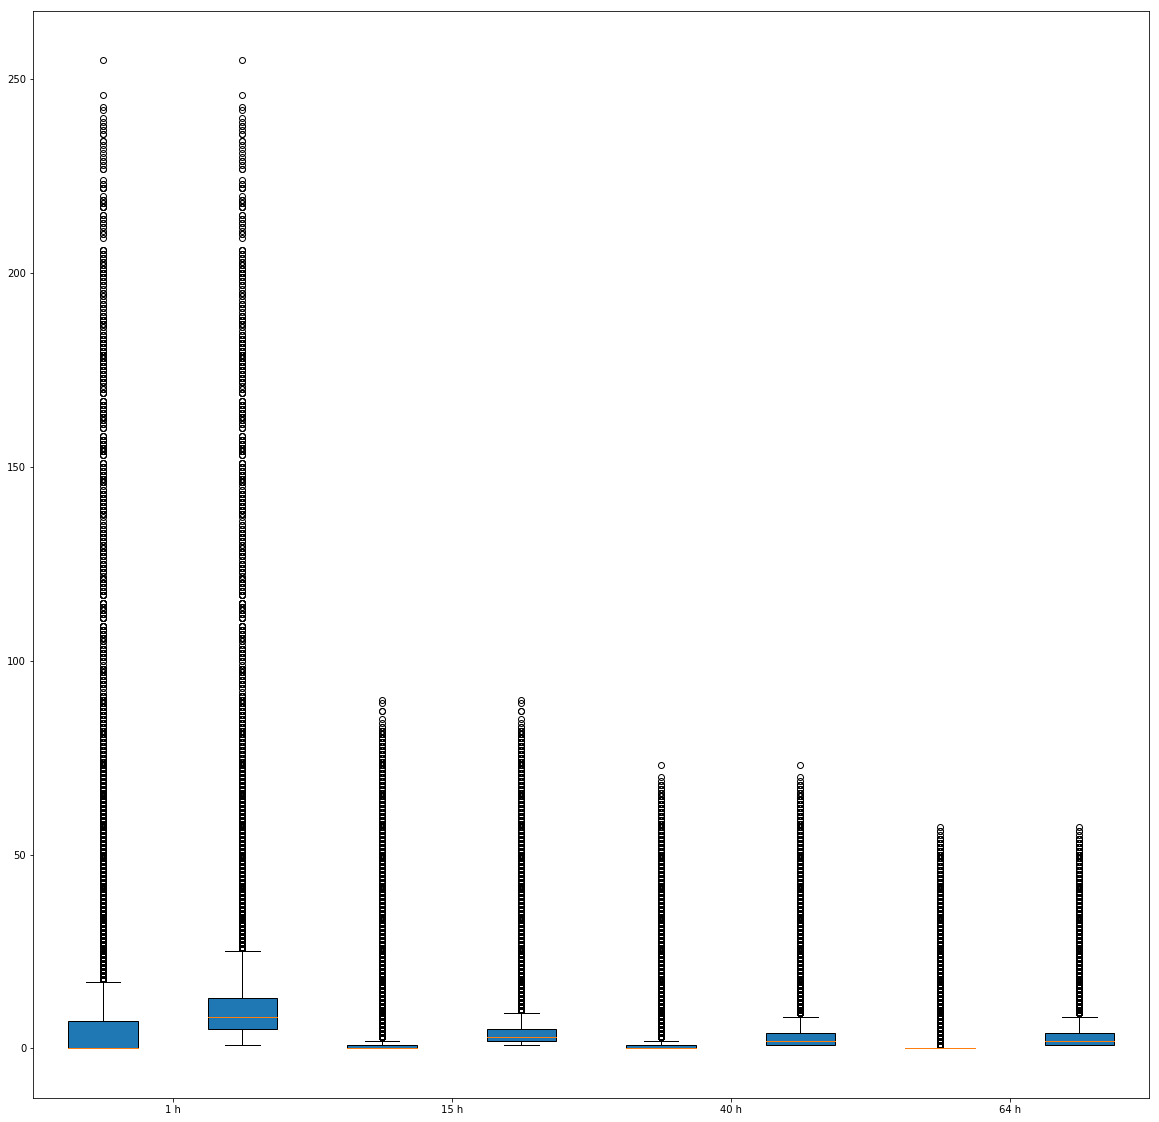

In [13]:
plt.figure(figsize=(20,20))
plt.boxplot([np.ravel(imagen_1),
             np.ravel(imagen_15),
             np.ravel(imagen_40),
             np.ravel(imagen_64),
             imagen_1[np.nonzero(imagen_1)],
             imagen_15[np.nonzero(imagen_15)],
             imagen_40[np.nonzero(imagen_40)],
             imagen_64[np.nonzero(imagen_64)]],
             patch_artist=True,positions=[0,2,4,6,1,3,5,7])

plt.xticks([0.5,2.5,4.5,6.5],['1 h' ,'15 h' ,'40 h' ,'64 h'])
plt.show()

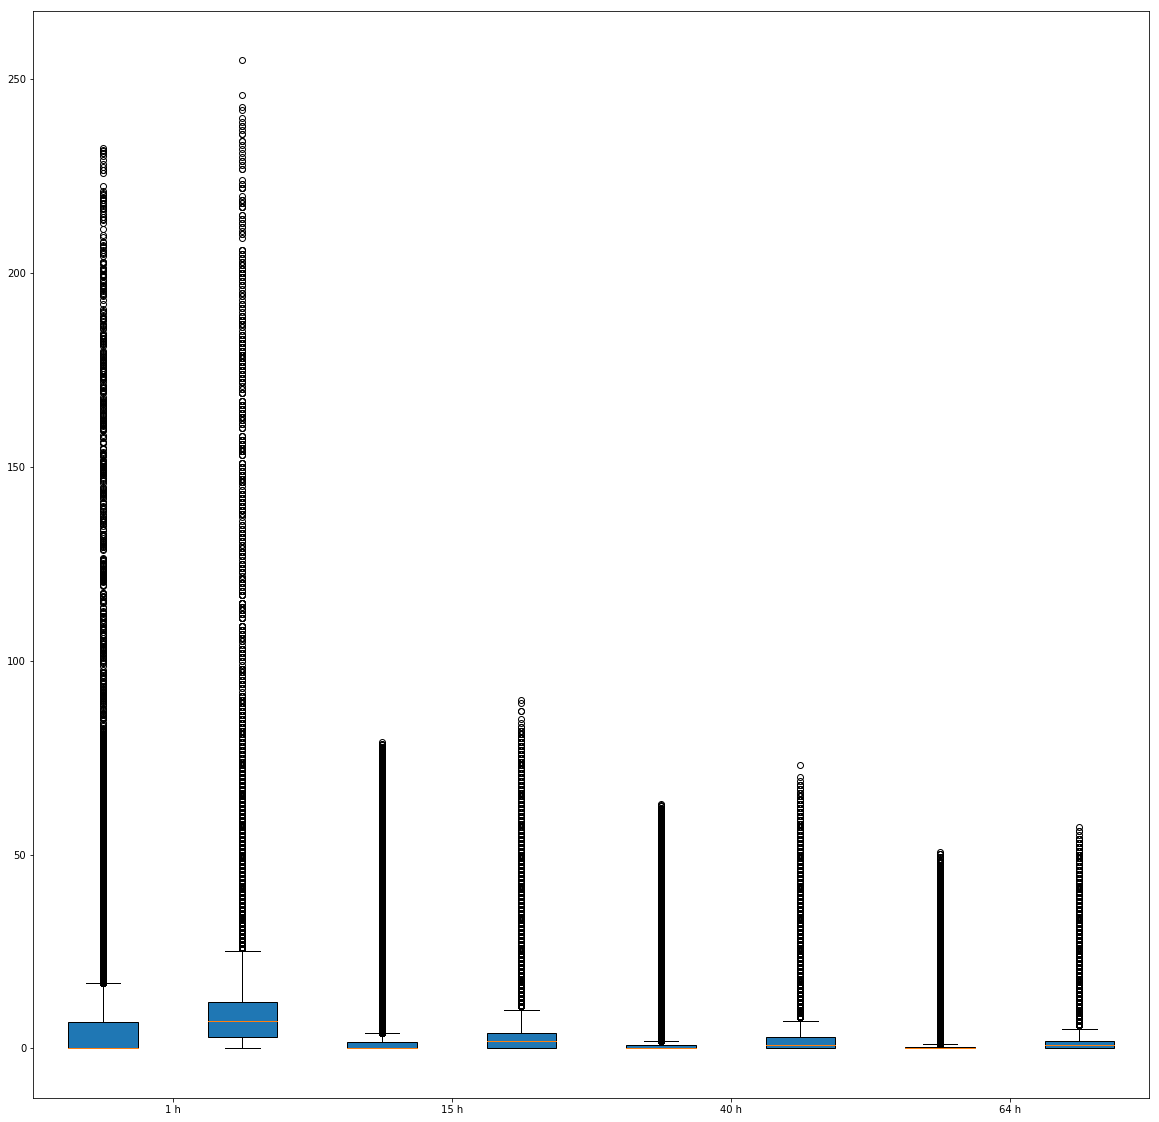

In [14]:
plt.figure(figsize=(20,20))
plt.boxplot([np.ravel(imagen_1_b),
             np.ravel(imagen_15_b),
             np.ravel(imagen_40_b),
             np.ravel(imagen_64_b),
             imagen_1[np.nonzero(imagen_1_b)],
             imagen_15[np.nonzero(imagen_15_b)],
             imagen_40[np.nonzero(imagen_40_b)],
             imagen_64[np.nonzero(imagen_64_b)]],
             patch_artist=True,positions=[0,2,4,6,1,3,5,7])

plt.xticks([0.5,2.5,4.5,6.5],['1 h' ,'15 h' ,'40 h' ,'64 h'])
plt.show()

## 3 .Defina de alguna forma la información que pueda considerarse “ruido” y encuentre outliers.##

([<matplotlib.axis.YTick at 0x151991f67320>,
 <a list of 103 Text yticklabel objects>)

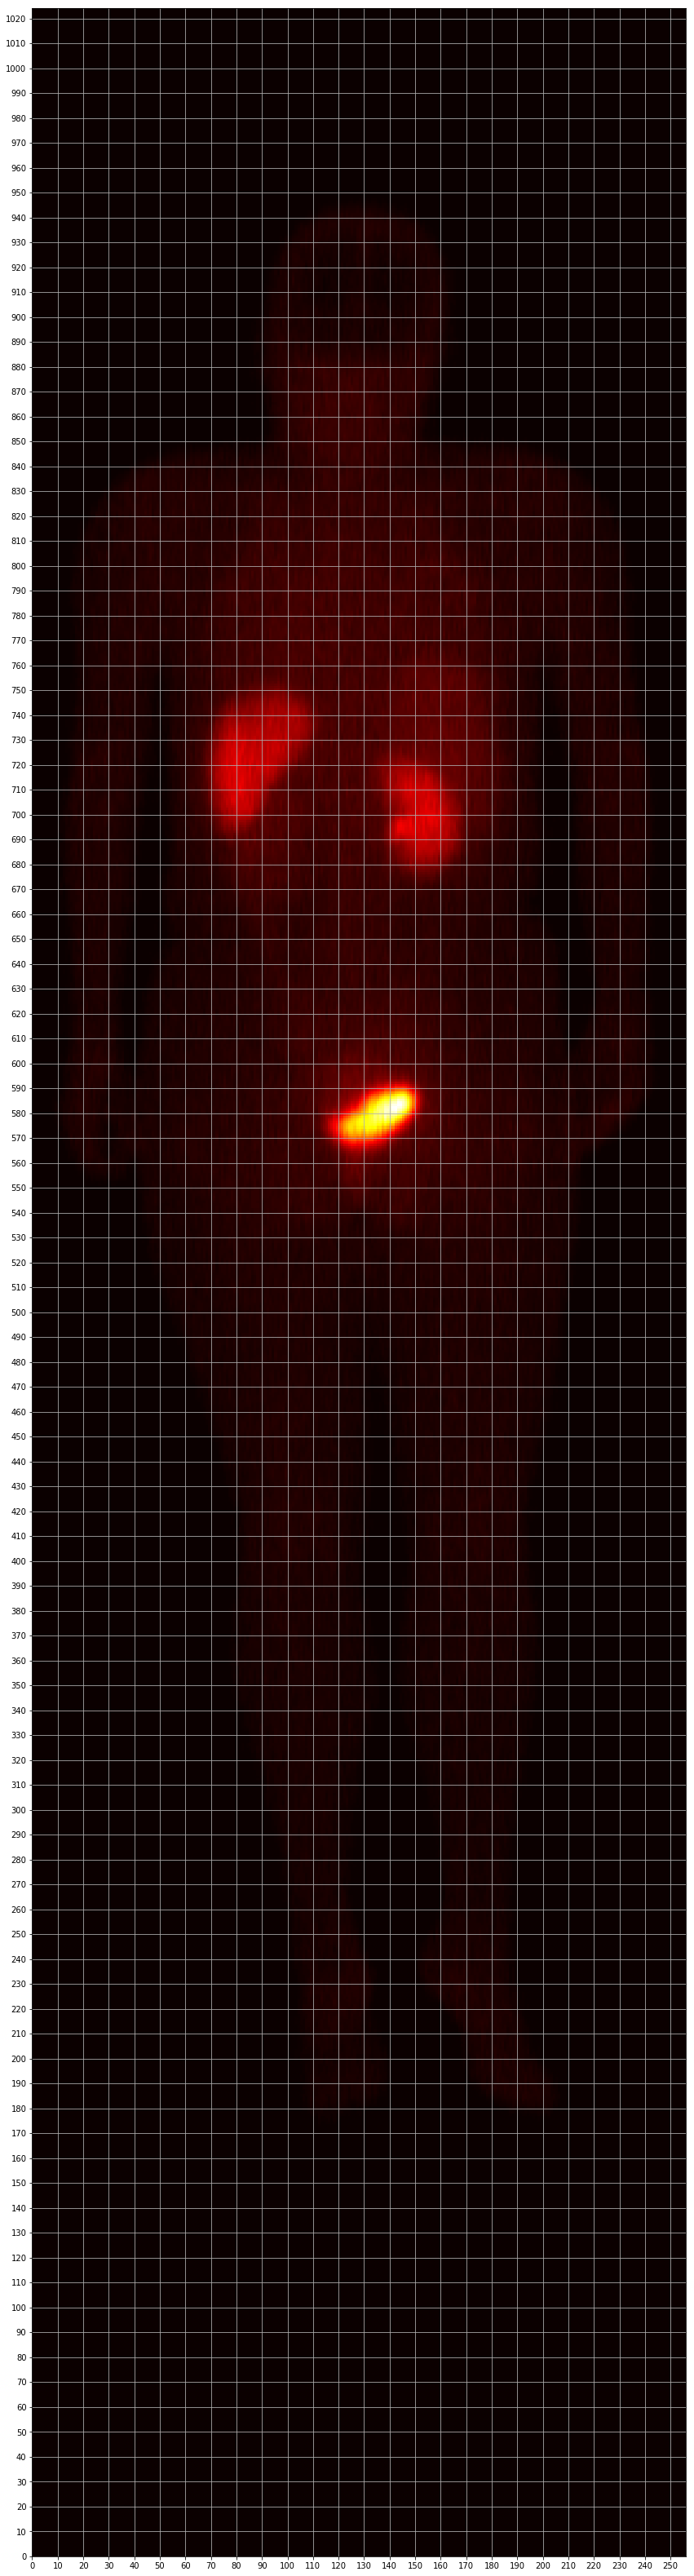

In [15]:
plt.figure(16,figsize=((d1*n1/0.0393701)/1000,(d0*n0/0.0393701)/1000))
plt.pcolormesh(imagen_1_b,cmap='hot')
#plt.colorbar(orientation='horizontal')
plt.axis('on')
plt.grid(which='both')
plt.xticks(np.arange(0,256,step=10))
plt.yticks(np.arange(0,1024,step=10))

In [16]:
#roi_1_d=[1024-770, 1024-670, 256-130, 256-60]
#roi_1_i=[1024-770, 1024-670, 256-195, 256-135]
roi_1=[685, 760, 60, 115]
roi_2=[670, 730, 125, 175]
roi_3=[560, 600, 110, 155]
roi_4=[610, 650, 90, 130]
roi_5=[800, 840,110, 150]

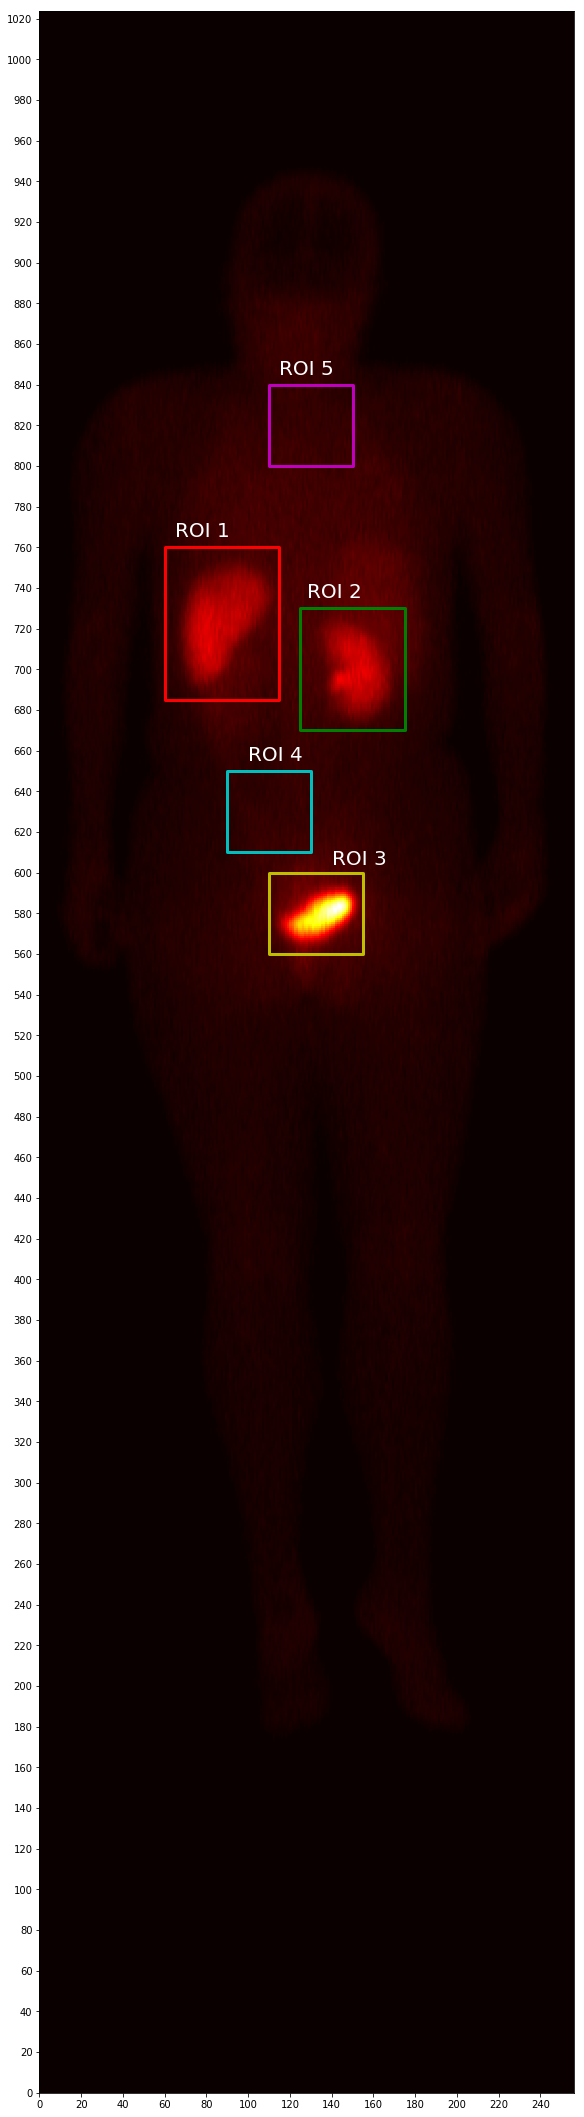

In [17]:

plt.figure(16,figsize=((d1*n1/0.0393701)/1500,(d0*n0/0.0393701)/1500))
plt.pcolormesh(imagen_1_b,cmap='hot')
plt.axis('on')
#plt.grid(which='both')
plt.xticks(np.arange(0,256,step=20))
plt.yticks(np.arange(0,1024,step=20))

ax = plt.gca()
patches=[]

# Creo un Rectangle patch para cada ROI
roi1 = mpatches.Rectangle((60,685),55,75)
plt.text(65,765,'ROI 1',fontsize=20,color='white')
patches.append(roi1)

roi2 = mpatches.Rectangle((125,670),50,60)
plt.text(128,735,'ROI 2',fontsize=20,color='white')
patches.append(roi2)

roi3 = mpatches.Rectangle((110,560),45,40)
plt.text(140,1024-420,'ROI 3',fontsize=20,color='white')
patches.append(roi3)

roi4 = mpatches.Rectangle((90,610),40,40)
plt.text(100,655,'ROI 4',fontsize=20,color='white')
patches.append(roi4)

roi5 = mpatches.Rectangle((110,800),40,40)
plt.text(115,845,'ROI 5',fontsize=20,color='white')
patches.append(roi5)

edgecolors=['r','g','y','c','m']
collection = PatchCollection(patches,facecolor='none',edgecolor=edgecolors,linewidth=3)
ax.add_collection(collection)

In [18]:
R1_imagen_1=imagen_1_b[roi_1[0]:roi_1[1],roi_1[2]:roi_1[3]]
R2_imagen_1=imagen_1_b[roi_2[0]:roi_2[1],roi_2[2]:roi_2[3]]
R3_imagen_1=imagen_1_b[roi_3[0]:roi_3[1],roi_3[2]:roi_3[3]]
R4_imagen_1=imagen_1_b[roi_4[0]:roi_4[1],roi_4[2]:roi_4[3]]
R5_imagen_1=imagen_1_b[roi_5[0]:roi_5[1],roi_5[2]:roi_5[3]]

R1_imagen_15=imagen_15_b[roi_1[0]:roi_1[1],roi_1[2]:roi_1[3]]
R2_imagen_15=imagen_15_b[roi_2[0]:roi_2[1],roi_2[2]:roi_2[3]]
R3_imagen_15=imagen_15_b[roi_3[0]:roi_3[1],roi_3[2]:roi_3[3]]
R4_imagen_15=imagen_15_b[roi_4[0]:roi_4[1],roi_4[2]:roi_4[3]]
R5_imagen_15=imagen_15_b[roi_5[0]:roi_5[1],roi_5[2]:roi_5[3]]

R1_imagen_40=imagen_40_b[roi_1[0]:roi_1[1],roi_1[2]:roi_1[3]]
R2_imagen_40=imagen_40_b[roi_2[0]:roi_2[1],roi_2[2]:roi_2[3]]
R3_imagen_40=imagen_40_b[roi_3[0]:roi_3[1],roi_3[2]:roi_3[3]]
R4_imagen_40=imagen_40_b[roi_4[0]:roi_4[1],roi_4[2]:roi_4[3]]
R5_imagen_40=imagen_40_b[roi_5[0]:roi_5[1],roi_5[2]:roi_5[3]]

R1_imagen_64=imagen_64_b[roi_1[0]:roi_1[1],roi_1[2]:roi_1[3]]
R2_imagen_64=imagen_64_b[roi_2[0]:roi_2[1],roi_2[2]:roi_2[3]]
R3_imagen_64=imagen_64_b[roi_3[0]:roi_3[1],roi_3[2]:roi_3[3]]
R4_imagen_64=imagen_64_b[roi_4[0]:roi_4[1],roi_4[2]:roi_4[3]]
R5_imagen_64=imagen_64_b[roi_5[0]:roi_5[1],roi_5[2]:roi_5[3]]

Como ruido, tomamos la media de valor de los píxels contenidos en las ROI4 y ROI5 más tres desvíos standar.

In [19]:
def fondo(ruido):
    promedio_ruido=np.max(ruido)
    return promedio_ruido+3*np.std(ruido)

ruido=np.concatenate((np.ravel(R4_imagen_1),np.ravel(R5_imagen_1)),axis=None)
bkg_1=fondo(ruido)

ruido=np.concatenate((np.ravel(R4_imagen_15),np.ravel(R5_imagen_15)),axis=None)
bkg_15=fondo(ruido)

ruido=np.concatenate((np.ravel(R4_imagen_40),np.ravel(R5_imagen_40)),axis=None)
bkg_40=fondo(ruido)

ruido=np.concatenate((np.ravel(R4_imagen_64),np.ravel(R5_imagen_64)),axis=None)
bkg_64=fondo(ruido)

In [20]:
imagen_1_lim=imagen_1_b*(imagen_1_b>bkg_1)*1.0
imagen_15_lim=imagen_15_b*(imagen_15_b>bkg_15)*1.0
imagen_40_lim=imagen_40_b*(imagen_40_b>bkg_40)*1.0
imagen_64_lim=imagen_64_b*(imagen_64_b>bkg_64)*1.0

In [21]:
R1_imagen_1_lim=imagen_1_lim[roi_1[0]:roi_1[1],roi_1[2]:roi_1[3]]
R2_imagen_1_lim=imagen_1_lim[roi_2[0]:roi_2[1],roi_2[2]:roi_2[3]]
R3_imagen_1_lim=imagen_1_lim[roi_3[0]:roi_3[1],roi_3[2]:roi_3[3]]
R4_imagen_1_lim=imagen_1_lim[roi_4[0]:roi_4[1],roi_4[2]:roi_4[3]]
R5_imagen_1_lim=imagen_1_lim[roi_5[0]:roi_5[1],roi_5[2]:roi_5[3]]

R1_imagen_15_lim=imagen_15_lim[roi_1[0]:roi_1[1],roi_1[2]:roi_1[3]]
R2_imagen_15_lim=imagen_15_lim[roi_2[0]:roi_2[1],roi_2[2]:roi_2[3]]
R3_imagen_15_lim=imagen_15_lim[roi_3[0]:roi_3[1],roi_3[2]:roi_3[3]]
R4_imagen_15_lim=imagen_15_lim[roi_4[0]:roi_4[1],roi_4[2]:roi_4[3]]
R5_imagen_15_lim=imagen_15_lim[roi_5[0]:roi_5[1],roi_5[2]:roi_5[3]]

R1_imagen_40_lim=imagen_40_lim[roi_1[0]:roi_1[1],roi_1[2]:roi_1[3]]
R2_imagen_40_lim=imagen_40_lim[roi_2[0]:roi_2[1],roi_2[2]:roi_2[3]]
R3_imagen_40_lim=imagen_40_lim[roi_3[0]:roi_3[1],roi_3[2]:roi_3[3]]
R4_imagen_40_lim=imagen_40_lim[roi_4[0]:roi_4[1],roi_4[2]:roi_4[3]]
R5_imagen_40_lim=imagen_40_lim[roi_5[0]:roi_5[1],roi_5[2]:roi_5[3]]

R1_imagen_64_lim=imagen_64_lim[roi_1[0]:roi_1[1],roi_1[2]:roi_1[3]]
R2_imagen_64_lim=imagen_64_lim[roi_2[0]:roi_2[1],roi_2[2]:roi_2[3]]
R3_imagen_64_lim=imagen_64_lim[roi_3[0]:roi_3[1],roi_3[2]:roi_3[3]]
R4_imagen_64_lim=imagen_64_lim[roi_4[0]:roi_4[1],roi_4[2]:roi_4[3]]
R5_imagen_64_lim=imagen_64_lim[roi_5[0]:roi_5[1],roi_5[2]:roi_5[3]]

A la izquierda observamos la imagen de la vejiga limpia, y a la derecha la normal.

<Figure size 432x288 with 0 Axes>

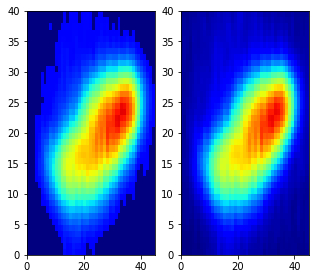

In [22]:
l ,h=np.shape(R3_imagen_1_lim)
plt.figure()
plt.subplots(1,2,figsize=((d1*h/0.0393701)/500,(d0*l/0.0393701)/500))
plt.subplot(1,2,1)
plt.pcolormesh(R3_imagen_1_lim,cmap='jet',vmax=maximo)
plt.subplot(1,2,2)
plt.pcolormesh(R3_imagen_1,cmap='jet',vmax=maximo)
plt.show()

Las siguientes son las imágenes obtenidas luego de filtrar los valores que señalamos como ruido (izquierda) y sin filtrar los valores considerados como ruido (derecha).

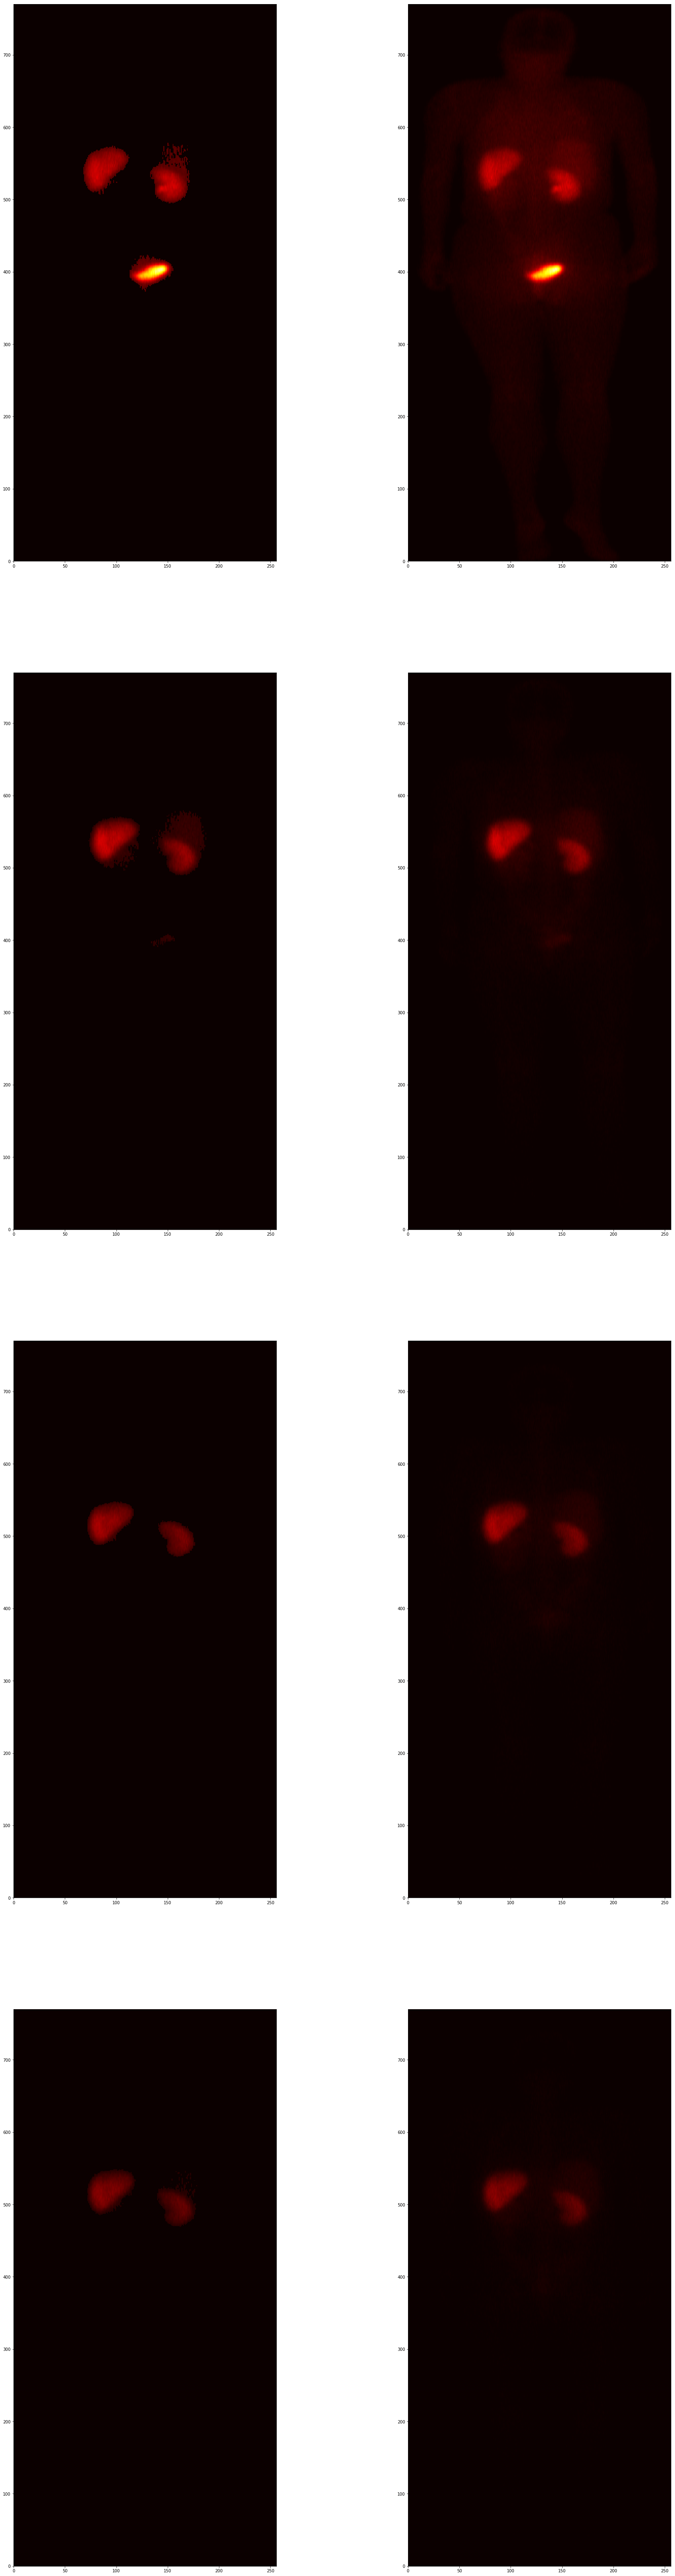

In [23]:
#plt.figure(figsize=(30,30))
plt.figure(figsize=(2*(d1*n1/0.0393701)/1000,2*(d0*n0/0.0393701)/1000))
#plt.subplots(1,2,figsize=((d1*n1/0.0393701)/2000,(d0*n0/0.0393701)/2000))
plt.subplot(4,2,1)
plt.pcolormesh(imagen_1_lim[180:950,:],cmap='hot',vmax=maximo)
plt.subplot(4,2,2)
plt.pcolormesh(imagen_1_b[180:950,:],cmap='hot',vmax=maximo)

plt.subplot(4,2,3)
plt.pcolormesh(imagen_15_lim[180:950,:],cmap='hot',vmax=maximo)
plt.subplot(4,2,4)
plt.pcolormesh(imagen_15_b[180:950,:],cmap='hot',vmax=maximo)

plt.subplot(4,2,5)
plt.pcolormesh(imagen_40_lim[180:950,:],cmap='hot',vmax=maximo)
plt.subplot(4,2,6)
plt.pcolormesh(imagen_40_b[180:950,:],cmap='hot',vmax=maximo)

plt.subplot(4,2,7)
plt.pcolormesh(imagen_64_lim[180:950,:],cmap='hot',vmax=maximo)
plt.subplot(4,2,8)
plt.pcolormesh(imagen_64_b[180:950,:],cmap='hot',vmax=maximo)

plt.subplots_adjust(wspace=0.5)
plt.show()

A continuación los gráficos de violín de las imágenes sin limpiar (derecha) y limpias (izquierda).

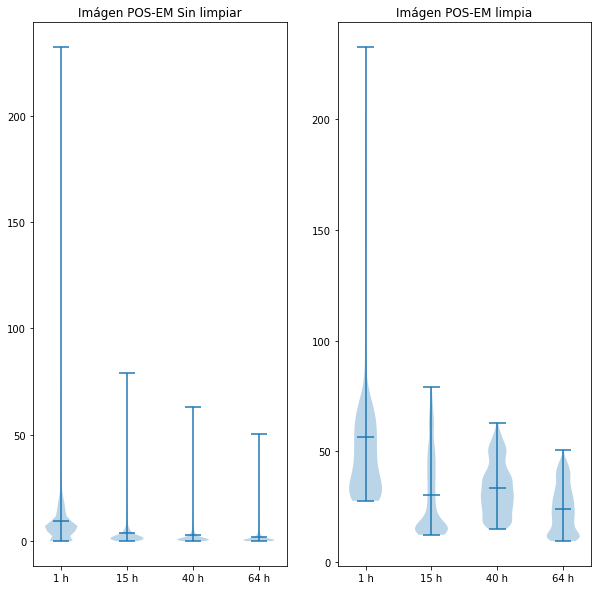

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.violinplot([imagen_1_b[np.nonzero(imagen_1_b)],
             imagen_15_b[np.nonzero(imagen_15_b)],
             imagen_40_b[np.nonzero(imagen_40_b)],
             imagen_64_b[np.nonzero(imagen_64_b)]],
             showmeans=True)
plt.xticks([1,2,3,4],['1 h' ,'15 h' ,'40 h' ,'64 h'])
plt.title('Imágen POS-EM Sin limpiar')

plt.subplot(1,2,2)
plt.violinplot([imagen_1_lim[np.nonzero(imagen_1_lim)],
             imagen_15_lim[np.nonzero(imagen_15_lim)],
             imagen_40_lim[np.nonzero(imagen_40_lim)],
             imagen_64_lim[np.nonzero(imagen_64_lim)]],
             showmeans=True)
plt.xticks([1,2,3,4],['1 h' ,'15 h' ,'40 h' ,'64 h'])
plt.title('Imágen POS-EM limpia')
plt.show()



## 4.Agrupe en un número que considere aceptable los datos de cada imagen y busque coeficientes de correlación entre grupos del mismo tiempo y grupos de distintos tiempos. Definido un conjunto de píxeles dentro de un grupo en la primera imagen, este grupo de píxeles debe pertenecer al mismo grupo en los tiempos siguientes.

## 5.Defina un criterio para poder dividir los datos en cada imagen en sub-regiones que pueda considerar “homogéneas”.

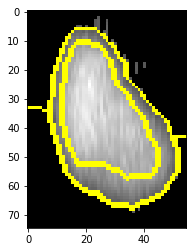

In [25]:
segments_slic = ski.segmentation.slic(R1_imagen_1_lim,n_segments=4, 
                                      compactness=20, sigma=1,max_iter=800,
                                     enforce_connectivity=True)
plt.imshow(ski.segmentation.mark_boundaries(R1_imagen_1_lim/np.max(R1_imagen_1_lim), segments_slic))

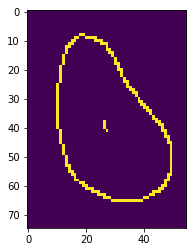

In [26]:
from skimage import feature
edges2 = feature.canny(R1_imagen_1_lim, sigma=4)
plt.imshow(edges2)

# Practico 2

## 1. Defina la elección del dataset y describa el mismo a partir de un análisis exploratorio que considere pertinente

### Se selecciona como dataset imágenes de cámara gama tomadas a 4 tiempos distintos (1h, 15h, 40h, 64h) para la posicion Posterior

In [27]:
print ('El estudio se realizo el' ,dicom_1h.StudyDate[6:8],'del',dicom_1h.StudyDate[6:8][4:6],'del',dicom_1h.StudyDate[6:8][0:4])
print ('A las',dicom_1h.SeriesTime[0:2],':',dicom_1h.SeriesTime[2:4],':',dicom_1h.SeriesTime[4:6])

El estudio se realizo el 13 del  del 13
A las 17 : 04 : 40


In [29]:
print ('El estudio se realizo el' ,dicom_15h.StudyDate[6:8],'del',dicom_15h.StudyDate[6:8][4:6],'del',dicom_15h.StudyDate[6:8][0:4])
print ('A las',dicom_15h.SeriesTime[0:2],':',dicom_15h.SeriesTime[2:4],':',dicom_15h.SeriesTime[4:6])

El estudio se realizo el 13 del  del 13
A las 09 : 07 : 12


In [30]:
print ('El estudio se realizo el' ,dicom_40h.StudyDate[6:8],'del',dicom_40h.StudyDate[6:8][4:6],'del',dicom_40h.StudyDate[6:8][0:4])
print ('A las',dicom_40h.SeriesTime[0:2],':',dicom_40h.SeriesTime[2:4],':',dicom_40h.SeriesTime[4:6])

El estudio se realizo el 13 del  del 13
A las 08 : 50 : 06


In [31]:
print ('El estudio se realizo el' ,dicom_64h.StudyDate[6:8],'del',dicom_64h.StudyDate[6:8][4:6],'del',dicom_64h.StudyDate[6:8][0:4])
print ('A las',dicom_64h.SeriesTime[0:2],':',dicom_64h.SeriesTime[2:4],':',dicom_64h.SeriesTime[4:6])

El estudio se realizo el 13 del  del 13
A las 08 : 04 : 21


In [32]:
print ('La imágen tiene', dicom_1h.Columns, 'pixels de ancho y',dicom_1h.Rows,'pixeles de largo')

La imágen tiene 256 pixels de ancho y 1024 pixeles de largo


In [33]:
print ('El tamaño de los pixeles es:',dicom_1h.PixelSpacing[0],'x',dicom_1h.PixelSpacing[0],'mm2')

El tamaño de los pixeles es: 2.209030 x 2.209030 mm2


## 2. Visualice los datos e identifique posibles clústers por diferentes métodos de clustering


In [34]:
segments_slic = ski.segmentation.slic(np.flipud(imagen_1_b),n_segments=150, 
                                      compactness=18, sigma=1,max_iter=800,
                                     enforce_connectivity=True)

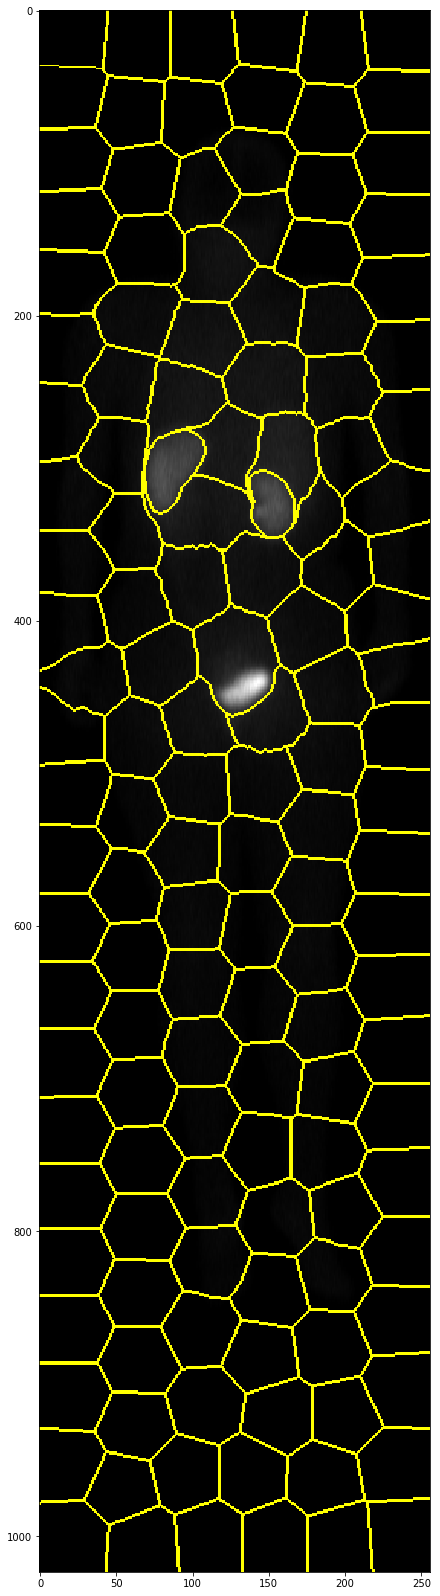

In [35]:
plt.figure(figsize=(2*(d1*n1/0.0393701)/4000,2*(d0*n0/0.0393701)/4000))
plt.imshow(ski.segmentation.mark_boundaries(np.flipud(imagen_1_b)/np.max(imagen_1_b), segments_slic))

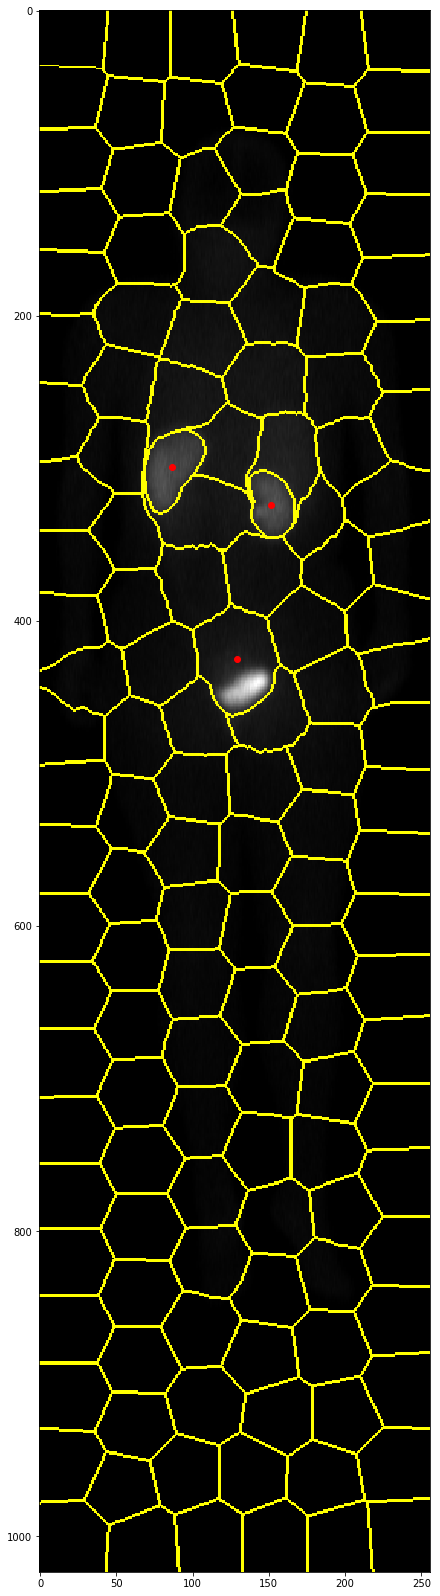

In [55]:
plt.figure(figsize=(2*(d1*n1/0.0393701)/4000,2*(d0*n0/0.0393701)/4000))

regions = ski.measure.regionprops(1+segments_slic,intensity_image=np.flipud(imagen_1_b))
ubicacion=[]
for props in regions:
    if props.max_intensity > np.max(imagen_1_b)*0.3:
        cy, cx = props.centroid
        ubicacion.append((cy.astype(int),cx.astype(int)))
        plt.plot(cx, cy, 'ro')

plt.imshow(ski.segmentation.mark_boundaries(np.flipud(imagen_1_b)/np.max(imagen_1_b), segments_slic))
plt.show()

In [57]:
ubicacion

[(299, 86), (323, 151), (424, 129)]

In [34]:
np.shape(segments_slic)

(1024, 256)

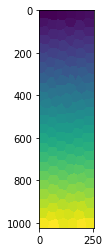

In [36]:
plt.imshow(segments_slic,)

In [61]:
segments_slic[ubicacion[2]]

58

In [75]:
i,j=np.where(segments_slic==58)

In [82]:
a=np.vstack((i,j)).T

KeyboardInterrupt: 

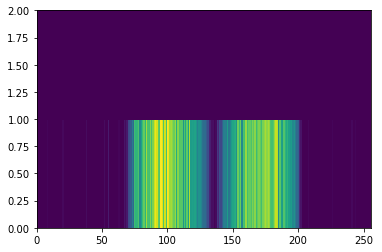

In [92]:
aux=np.zeros((len(a),len(a)))
for i in a:
    aux[i]
    plt.pcolormesh(imagen_1_b[a[i]])